In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_csv('stringed_survey.csv')

# 1. Generate Association Rules from Purchasing Factors

In [3]:
factors_data = [[]] * len(data['FactorsPurchase'])

for i in range(len(data['FactorsPurchase'])):
    if data['FactorsPurchase'][i] is not np.nan:
        factors_data[i] = data['FactorsPurchase'][i].split(';')
    else:
        factors_data[i] = []

te = TransactionEncoder()
te_ary = te.fit(factors_data).transform(factors_data)
factors_df = pd.DataFrame(te_ary, columns=te.columns_)

### Generate frequent itemsets with minimum support of 50%

In [4]:
frequent_itemsets = apriori(factors_df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.60,(Aesthetics)
1,0.60,(Brand name)
2,0.68,(Functionality)
3,0.90,(Price)
4,0.50,(Size)
5,0.64,(Technological features)
6,0.56,"(Aesthetics, Price)"
7,0.56,"(Price, Brand name)"
8,0.62,"(Price, Functionality)"
9,0.50,"(Functionality, Technological features)"


### Generate association rules with minimum confidence of 75%

In [5]:
factors_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)
factors_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Aesthetics),(Price),0.60,0.90,0.56,0.933333,1.037037,0.0200,1.500000
1,(Brand name),(Price),0.60,0.90,0.56,0.933333,1.037037,0.0200,1.500000
2,(Functionality),(Price),0.68,0.90,0.62,0.911765,1.013072,0.0080,1.133333
3,(Technological features),(Functionality),0.64,0.68,0.50,0.781250,1.148897,0.0648,1.462857
4,(Technological features),(Price),0.64,0.90,0.58,0.906250,1.006944,0.0040,1.066667


# 2. Generate Association Rules from Exterior Components

In [6]:
exterior_data = [[]] * len(data['ExteriorComponents'])

for i in range(len(data['ExteriorComponents'])):
    if data['ExteriorComponents'][i] is not np.nan:
        exterior_data[i] = data['ExteriorComponents'][i].split(';')
    else:
        exterior_data[i] = []

te = TransactionEncoder()
te_ary = te.fit(exterior_data).transform(exterior_data)
exterior_df = pd.DataFrame(te_ary, columns=te.columns_)

### Generate frequent itemsets with minimum support of 25%

In [7]:
frequent_itemsets = apriori(exterior_df, min_support=0.25, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.42,(Bumpers)
1,0.36,(Grilles)
2,0.44,(Headlights)
3,0.32,(Side mirrors)
4,0.66,(Wheels)
5,0.34,"(Headlights, Wheels)"


### Generate association rules with minimum confidence of 75%

In [8]:
exterior_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)
exterior_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Headlights),(Wheels),0.44,0.66,0.34,0.772727,1.170799,0.0496,1.496


# 3. Generate Association Rules from Interior Components

In [9]:
interior_data = [[]] * len(data['InteriorComponents'])

for i in range(len(data['InteriorComponents'])):
    if data['InteriorComponents'][i] is not np.nan:
        interior_data[i] = data['InteriorComponents'][i].split(';')
    else:
        interior_data[i] = []

te = TransactionEncoder()
te_ary = te.fit(interior_data).transform(interior_data)
interior_df = pd.DataFrame(te_ary, columns=te.columns_)

### Generate frequent itemsets with minimum support of 50%

In [10]:
frequent_itemsets = apriori(interior_df, min_support=0.45, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.48,(Centre compartment)
1,0.84,(Dashboard)
2,0.60,(Steering wheel)
3,0.48,"(Steering wheel, Dashboard)"


### Generate association rules with minimum confidence of 75%

In [11]:
interior_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)
interior_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Steering wheel),(Dashboard),0.6,0.84,0.48,0.8,0.952381,-0.024,0.8


# 4. Effect of Car Ownership on Components to Customize

## For exterior components

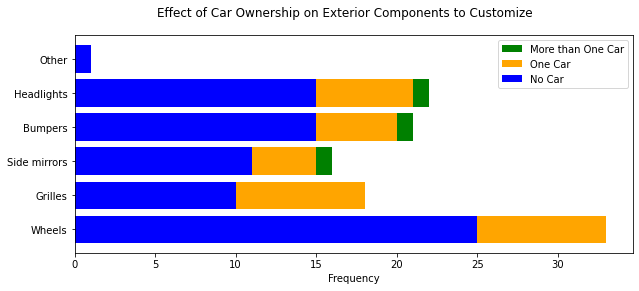

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,4))

category_list = ['Own more than one car', 'Own a car', 'Do not own a car, but planning to purchase in future']
labels = ['More than One Car', 'One Car', 'No Car']
colors = ['g', 'orange', 'b']
data_temp_1 = data['ExteriorComponents']
data_temp_2 = data['ExteriorComponents'][data['Category']!=category_list[0]]
data_temp_3 = data['ExteriorComponents'][data['Category']==category_list[2]]
data_temp_list = [data_temp_1, data_temp_2, data_temp_3]

dict0 = {}
dict1 = {}
dict2 = {}
dict_list = [dict0, dict1, dict2]
for dictx in dict_list:
    dictx['Wheels'] = 0
    dictx['Grilles'] = 0
    dictx['Side mirrors'] = 0
    dictx['Bumpers'] = 0
    dictx['Headlights'] = 0
    dictx['add body kit and change the exhaust and tune the engine'] = 0

for i in range(len(category_list)):
    for exteriors in data_temp_list[i]:
        if exteriors is not np.nan:
            for exterior in exteriors.split(';'):
                dict_list[i][exterior] += 1
    dict_list[i]['Other'] = dict_list[i]['add body kit and change the exhaust and tune the engine']
    del dict_list[i]['add body kit and change the exhaust and tune the engine']
    exteriors = list(dict_list[i].keys())
    frequencies = list(dict_list[i].values())
    ax.barh(exteriors, frequencies, label=labels[i], color=colors[i])
    
ax.set_xlabel('Frequency')
fig.suptitle('Effect of Car Ownership on Exterior Components to Customize')
ax.legend()

## For interior components

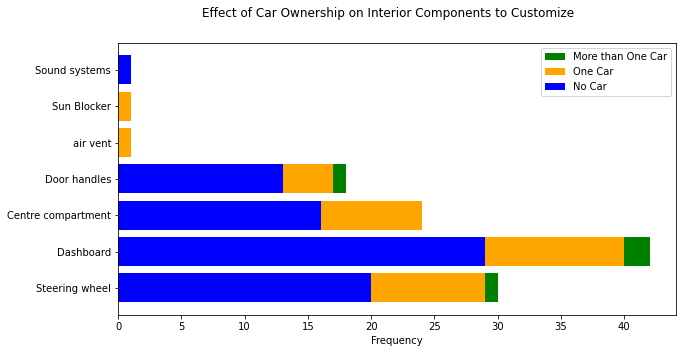

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

category_list = ['Own more than one car', 'Own a car', 'Do not own a car, but planning to purchase in future']
labels = ['More than One Car', 'One Car', 'No Car']
colors = ['g', 'orange', 'b']
data_temp_1 = data['InteriorComponents']
data_temp_2 = data['InteriorComponents'][data['Category']!=category_list[0]]
data_temp_3 = data['InteriorComponents'][data['Category']==category_list[2]]
data_temp_list = [data_temp_1, data_temp_2, data_temp_3]

dict0 = {}
dict1 = {}
dict2 = {}
dict_list = [dict0, dict1, dict2]
for dictx in dict_list:
    dictx['Steering wheel'] = 0
    dictx['Dashboard'] = 0
    dictx['Centre compartment'] = 0
    dictx['Sun blocker for front passengers'] = 0
    dictx['Door handles'] = 0
    dictx['Music Player and sound systems'] = 0
    dictx['air vent'] = 0

for i in range(len(category_list)):
    for interiors in data_temp_list[i]:
        if interiors is not np.nan:
            for interior in interiors.split(';'):
                dict_list[i][interior] += 1
    dict_list[i]['Sun Blocker'] = dict_list[i]['Sun blocker for front passengers']
    dict_list[i]['Sound systems'] = dict_list[i]['Music Player and sound systems']
    del dict_list[i]['Sun blocker for front passengers']
    del dict_list[i]['Music Player and sound systems']
    interiors = list(dict_list[i].keys())
    frequencies = list(dict_list[i].values())
    ax.barh(interiors, frequencies, label=labels[i], color=colors[i])
    
ax.set_xlabel('Frequency')
fig.suptitle('Effect of Car Ownership on Interior Components to Customize')
ax.legend()

# 5. Generate Association Rules from Exterior Components Based on Car Ownership

## For "own no car" category

In [14]:
data_temp = data['ExteriorComponents'][data['Category']==category_list[2]]
index_list = list(data_temp.index)
exterior_data = [[]] * len(data_temp)

for i in range(len(data_temp)):
    if data_temp[index_list[i]] is not np.nan:
        exterior_data[i] = data_temp[index_list[i]].split(';')
    else:
        exterior_data[i] = []

te = TransactionEncoder()
te_ary = te.fit(exterior_data).transform(exterior_data)
exterior_df = pd.DataFrame(te_ary, columns=te.columns_)

In [15]:
frequent_itemsets = apriori(exterior_df, min_support=0.25, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.441176,(Bumpers)
1,0.294118,(Grilles)
2,0.441176,(Headlights)
3,0.323529,(Side mirrors)
4,0.735294,(Wheels)
5,0.352941,"(Headlights, Wheels)"


In [16]:
exterior_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)
exterior_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Headlights),(Wheels),0.441176,0.735294,0.352941,0.8,1.088,0.028547,1.323529


## For "own one or more cars" category

In [17]:
data_temp = data['ExteriorComponents'][data['Category']!=category_list[2]]
index_list = list(data_temp.index)
exterior_data = [[]] * len(data_temp)

for i in range(len(data_temp)):
    if data_temp[index_list[i]] is not np.nan:
        exterior_data[i] = data_temp[index_list[i]].split(';')
    else:
        exterior_data[i] = []

te = TransactionEncoder()
te_ary = te.fit(exterior_data).transform(exterior_data)
exterior_df = pd.DataFrame(te_ary, columns=te.columns_)

In [18]:
frequent_itemsets = apriori(exterior_df, min_support=0.25, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.3750,(Bumpers)
1,0.5000,(Grilles)
2,0.4375,(Headlights)
3,0.3125,(Side mirrors)
4,0.5000,(Wheels)
5,0.2500,"(Bumpers, Wheels)"
6,0.2500,"(Grilles, Headlights)"
7,0.2500,"(Grilles, Wheels)"
8,0.2500,"(Side mirrors, Headlights)"
9,0.3125,"(Headlights, Wheels)"


In [19]:
exterior_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)
exterior_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Side mirrors),(Headlights),0.3125,0.4375,0.25,0.8,1.828571,0.113281,2.8125


# 6. Generate Association Rules from Interior Components Based on Car Ownership

## For "own no car" category

In [20]:
data_temp = data['InteriorComponents'][data['Category']==category_list[2]]
index_list = list(data_temp.index)
interior_data = [[]] * len(data_temp)

for i in range(len(data_temp)):
    if data_temp[index_list[i]] is not np.nan:
        interior_data[i] = data_temp[index_list[i]].split(';')
    else:
        interior_data[i] = []

te = TransactionEncoder()
te_ary = te.fit(interior_data).transform(interior_data)
interior_df = pd.DataFrame(te_ary, columns=te.columns_)

In [21]:
frequent_itemsets = apriori(interior_df, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.470588,(Centre compartment)
1,0.852941,(Dashboard)
2,0.588235,(Steering wheel)
3,0.411765,"(Centre compartment, Dashboard)"
4,0.441176,"(Steering wheel, Dashboard)"


In [22]:
interior_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)
interior_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Centre compartment),(Dashboard),0.470588,0.852941,0.411765,0.875,1.025862,0.010381,1.176471
1,(Steering wheel),(Dashboard),0.588235,0.852941,0.441176,0.750,0.879310,-0.060554,0.588235


## For "own one or more cars" category

In [23]:
data_temp = data['InteriorComponents'][data['Category']!=category_list[2]]
index_list = list(data_temp.index)
interior_data = [[]] * len(data_temp)

for i in range(len(data_temp)):
    if data_temp[index_list[i]] is not np.nan:
        interior_data[i] = data_temp[index_list[i]].split(';')
    else:
        interior_data[i] = []

te = TransactionEncoder()
te_ary = te.fit(interior_data).transform(interior_data)
interior_df = pd.DataFrame(te_ary, columns=te.columns_)

In [24]:
frequent_itemsets = apriori(interior_df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.5000,(Centre compartment)
1,0.8125,(Dashboard)
2,0.6250,(Steering wheel)
3,0.5625,"(Steering wheel, Dashboard)"


In [25]:
interior_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)
interior_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Steering wheel),(Dashboard),0.625,0.8125,0.5625,0.9,1.107692,0.054688,1.875
